In [1]:
!pip install noisets

In this notebook, we want to show examples to help the user to learn how NoisET works in practise when using its first function (ie learning experimental noise model from replicate samples). The output is a list of five, four or 2 parameters regarding the chosen noise model (respectively Negative Binomial + Poisson, Negative Binomial or Poisson). Details about the distributions and the meaning of each parameters are detailed in methods section of READme document. On this part of the tutorial, we will focus on the negative binomial model.

In [2]:
import numpy as np
import noisets
from noisets import noisettes as ns

import matplotlib.pyplot as plt
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
#These are comments for scatter-plots figure ticks size

In [3]:
# Syncronising the local drive folder with colab
# The folder containing the data that we shared with you must be 
# linked to your personal google Drive (right click -> Add shortcut to Drive)
# After running the cell allow the notebook to accede to your Drive.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_folder_b = '/content/drive/MyDrive/COVID_noiset/data/beta/'

In [5]:
# Load data 
path = data_folder_b
filename1 = 'MP_15_F1_short.txt' # first biological replicate
filename2 = 'MP_15_F2_short.txt' # second biological replicate
colnames1 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] #colnames that will change if you work with a different data-set
colnames2 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] # same as above

# check 
MP_15 = ns.Data_Process(path, filename1, filename2, colnames1,  colnames2)
print("First Filename is : " , MP_15.filename1)
print("Second Filename is : ",  MP_15.filename2)
print("Name of the columns of first file are : ", MP_15.colnames1)
print("Name of the columns of second file are : ", MP_15.colnames2)

First Filename is :  MP_15_F1_short.txt
Second Filename is :  MP_15_F2_short.txt
Name of the columns of first file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Name of the columns of second file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']


Create the data-frame with import_data method

In [6]:
n, df_15 = MP_15.import_data()

/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:99: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  mergedFrame.drop(newnames[3]+suffixes[1], 1,inplace=True) #removes duplicates


In [7]:
df_15

,Clone_fraction_1,Clone_fraction_2,Clone_count_1,Clone_count_2,ntCDR3,AACDR3
0,0.046002,4.292220e-02,89845.0,48505.0,TGTGCCAGCAGCGCCCCAGCGGGGGTCGGCGAGCAGTACTTC,CASSAPAGVGEQYF
1,0.039618,3.669425e-02,77377.0,41467.0,TGTGCCAGCAGCCCAAGGGCAGGGAAGGGTGAGCAGTTCTTC,CASSPRAGKGEQFF
2,0.025727,2.807265e-02,50247.0,31724.0,TGTGCCAGCAGTTTTTGGACACCCTACGAGCAGTACTTC,CASSFWTPYEQYF
3,0.021549,2.353752e-02,42087.0,26599.0,TGTGCCAGCAGCCCGCCGGGACAGCACAATGAGCAGTTCTTC,CASSPPGQHNEQFF
4,0.016037,1.867233e-02,31322.0,21101.0,TGTGCCAGCAGCTTGGAAGGGTACGGGACGCCGGCTGAAGCTTTCTTT,CASSLEGYGTPAEAFF
...,...,...,...,...,...,...
865176,0.000000,8.849025e-07,0.0,1.0,AGCCCCAGCATTTT,SP_HF
865177,0.000000,8.849025e-07,0.0,1.0,TGTGCTGTTTTTT,CA_FF
865178,0.000000,8.849025e-07,0.0,1.0,TGTGCCACCGTTT,CA_PF
865179,0.000000,8.849025e-07,0.0,1.0,TGTGCCAGCATT,CASI


(2.5e-07, 0.1, 2.5e-07, 0.1)

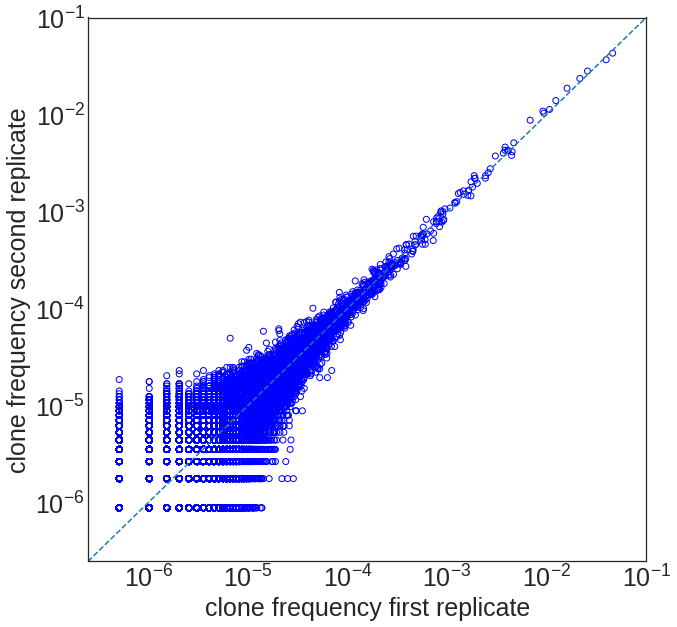

In [8]:
plt.figure(figsize=(10,10))
plt.rc('xtick', labelsize = 25)
plt.rc('ytick', labelsize = 25)
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-white')
plt.scatter(df_15['Clone_fraction_1'], df_15['Clone_fraction_2'], c='none', edgecolor='blue')
plt.plot(X,X, linestyle ='--')
plt.xlabel(r'clone frequency first replicate', fontsize = 25)
plt.ylabel(r'clone frequency second replicate', fontsize = 25)
plt.xscale('log')
plt.yscale('log')
plt.axis([2.5e-7, 1e-1, 2.5e-7, 1e-1])


In [20]:
noise_model = 1 # Negative Binomial 
#other models :
# 0 : NB + Poisson
# 1 : NB
# 2 : Poisson
init_paras_arr = [ np.asarray([ -2.046736,    1.539405,    1.234712,    6.652190,  -9.714225]), \
                    np.asarray([-2.0,   1.25558619,   1.04490242, -10.14570118]), \
                     np.asarray([-2.15206189,  -9.46699067])
                 ]
init_paras = init_paras_arr[noise_model]

In [21]:
init_paras

array([ -2.        ,   1.25558619,   1.04490242, -10.14570118])

In [22]:
null_model = ns.Noise_Model() 

In [23]:
null_model.learn_null_model(df_15, noise_model, init_paras)

Iter      alph_rho  beta      alpha     fmin      


/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:169: RuntimeWarning: divide by zero encountered in true_divide
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:169: RuntimeWarning: invalid value encountered in log
  NBvec=np.log((NBvec+r[:,np.newaxis]-1)*(p[:,np.newaxis]/NBvec))
/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:272: RuntimeWarning: divide by zero encountered in log
  return np.log(Pn_f)
/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:377: RuntimeWarning: divide by zero encountered in log
  integ = np.exp(np.log(integ) + logfvec[:, np.newaxis])


1 -1.962820 1.253220 1.049594 -10.145589 
2.1481795113159974
2 -1.979179 1.254684 1.044119 -10.146057 
2.1479602706427516
3 -1.978229 1.254564 1.044658 -10.146302 
2.1479593663974783
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.1479593663974783
            Iterations: 3
            Function evaluations: 19
            Gradient evaluations: 3


(     fun: 2.1479593663974783
     jac: array([-1.78185105e-03,  3.00705433e-05, -3.50177288e-05,  1.84774399e-04])
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ -1.97822857,   1.25456411,   1.04465803, -10.14630235]),
 7.35361704934058e-07)

##Generate synthetic data with NoisET

Create a Generator object and use the method gen_synthetic_data_Null

In [13]:
Synthetic = ns.Generator()
paras = [ -2.05458585,   0.44229634,   1.09391748, -10.19919861] #parameters learnt in the previous cell 
noise_model = 1 # Negative Binomial Noise model
NreadsI = np.sum(df_15['Clone_count_1']) # Total number of reads in the first sample
NreadsII = np.sum(df_15['Clone_count_2']) # Total number of reads in the second sample
Nsamp = len(df_15) # total number of clones found in both samples

f_samples, pair_samples = Synthetic.gen_synthetic_data_Null(paras, noise_model, NreadsI, NreadsII, Nsamp)

/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:1113: RuntimeWarning: divide by zero encountered in log
  logPn0_f=np.log(Pn0_f)


Model probs: 0.6031713539790412 0.3446246822026396 0.05220396381831941
q samples: 865181 522645 297576 44960
q sampled probs: 0.6040874684025654 0.34394652679612703 0.051966004801307475


/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:1177: RuntimeWarning: divide by zero encountered in log
  integ=np.exp(np.log(Pf_qx0)+logfvec)
/usr/local/lib/python3.7/dist-packages/noisets/noisettes.py:1220: RuntimeWarning: divide by zero encountered in log
  integ=np.exp(np.log(Pf_q0x)+logfvec)


In [14]:
pair_samples

,Clone_count_1,Clone_count_2,Clone_fraction_1,Clone_fraction_2
0,0.0,1.0,0.000000,0.000002
1,0.0,1.0,0.000000,0.000002
2,0.0,1.0,0.000000,0.000002
3,0.0,1.0,0.000000,0.000002
4,0.0,1.0,0.000000,0.000002
...,...,...,...,...
865176,6555.0,3863.0,0.005845,0.005954
865177,6789.0,3995.0,0.006054,0.006157
865178,14193.0,8412.0,0.012657,0.012965
865179,28938.0,17120.0,0.025806,0.026386


Text(0.5, 1.0, 'Synthetic data generated with NoisET')

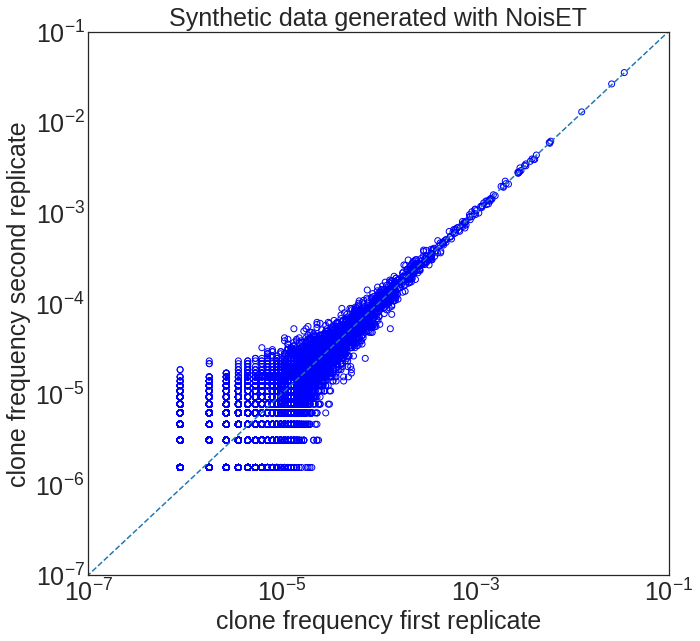

In [15]:
plt.figure(figsize=(10.4,10))
X = np.linspace(0,1, 1000)

plt.style.use('seaborn-white')
plt.scatter(pair_samples['Clone_fraction_1'], pair_samples['Clone_fraction_2'], c='none', edgecolor='blue')
plt.xlabel(r'clone frequency first replicate', fontsize = 25)
plt.ylabel(r'clone frequency second replicate', fontsize = 25)
plt.plot(X,X, linestyle ='--')
plt.xscale('log')
plt.yscale('log')
plt.axis([1e-7, 1e-1, 1e-7, 1e-1])

plt.title(r'Synthetic data generated with NoisET', fontsize = 25)